# Chicory segmentation using a YOLOv8 model

For the segmentation of chicory, we use a YOLOv8 model for segmentation purposes. The data was created and labeled by Captic. The labels contains the bounding box and the segmentation masks of the complete chicory and the loaf. The data was converted to YOLO format and to COCO format for visualisation. 

In [1]:
# Imports
import os
import ultralytics
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

## Data analysis

The data folder contains a folder with images and a folder with labels in the YOLO format. This format has a .txt file for every image with one line for each annotation. Each line contains the image class, the normalized bounding box coordinates [x_center, y_center, width, height], and the normalized coordinates of polygon that defines the segmentation mask. We also use a .json file with all labels in COCO format for visualization of the labels.

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


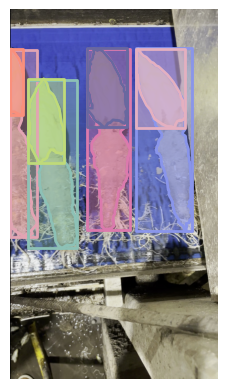

In [2]:
# Create a COCO object
coco = COCO('../../data/chicory_data_segmentation/witloof_dataset_coco.json')

# Get the annotations for this image
annotations = coco.loadAnns(coco.getAnnIds(imgIds=1))

# Get the image info
img_info = coco.loadImgs(1)[0]
height, width = img_info['height'], img_info['width']
file_name = img_info['file_name'].split('/')[-1]
img_path = os.path.join('../../data/chicory_data_segmentation/images/', file_name)
image = plt.imread(img_path)

# Load and display instance annotations
plt.imshow(image); plt.axis('off')
coco.showAnns(annotations, draw_bbox=True)
plt.show()

# Data preprocessing

For a proper pipeline, we will split our total dataset into a training, validation, and testset. De model gets trained on images from the training set. After each batch, the model is validated on the validation set. After training, we can evaluate the final model on the testset. The below command creates three autosplit .txt files that contain the paths to the images of the corresponding dataset for training, validation, and testing.

In [3]:
# Split data in 80% training, 10% validation, and 10% test sets
ultralytics.data.utils.autosplit(path='../../data/chicory_data_segmentation/images', weights=(0.8, 0.1, 0.1), annotated_only=False)

Autosplitting images from ..\..\data\chicory_data_segmentation\images


  0%|          | 0/288 [00:00<?, ?it/s]

100%|██████████| 288/288 [00:00<00:00, 6381.46it/s]

## Model training

In the next step, we will train our model. The model that we use is a pretrained YOLOv8n-seg model that was trained on the COCO dataset. We use the Ultralytics API for the training and validation phase. More info on: https://docs.ultralytics.com/tasks/pose/. All model parameters are logged during training, all parameters can be visualized using Tensorboard which will be activated below. 

In [4]:
# Load a YOLOv8 model for segmentation
model = YOLO('yolov8n-seg.yaml').load('yolov8n-seg.pt')  # build from YAML and transfer weights

# Training params
epochs = 20 # All data is sent 'epoch' times through the network
image_size = 640 # All images are resized to this size before entering the network

# Train the model
results = model.train(data='../../data/chicory_data_segmentation/witloof_dataset.yaml', epochs=epochs, imgsz=image_size)

  0%|                                                                                                                  | 0.00/6.73M [00:00<?, ?B/s]

 16%|████████████████▉                                                                                        | 1.09M/6.73M [00:00<00:00, 11.0MB/s]

 39%|█████████████████████████████████████████▎                                                               | 2.65M/6.73M [00:00<00:00, 13.8MB/s]

 63%|██████████████████████████████████████████████████████████████████▍                                      | 4.26M/6.73M [00:00<00:00, 15.0MB/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▎              | 5.79M/6.73M [00:00<00:00, 15.4MB/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.73M/6.73M [00:00<00:00, 13.7MB/s]

Transferred 417/417 items from pretrained weights


Ultralytics YOLOv8.1.14 🚀 Python-3.10.11 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A500 Laptop GPU, 4096MiB)


engine\trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=../../data/chicory_data_segmentation/witloof_dataset.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, k

Overriding model.yaml nc=80 with nc=2



                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 


  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                


  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             


  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                


  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             


  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           


  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              


  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           


  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 


 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          


 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           


 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 


 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          


 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           


 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  


 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                


 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           


 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 


 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              


 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           


 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 


 22        [15, 18, 21]  1   1004470  ultralytics.nn.modules.head.Segment          [2, 32, 64, [64, 128, 256]]   


YOLOv8n-seg summary: 261 layers, 3264006 parameters, 3263990 gradients, 12.1 GFLOPs


Transferred 381/417 items from pretrained weights


TensorBoard: Start with 'tensorboard --logdir ..\runs\segment\train', view at http://localhost:6006/


Freezing layer 'model.22.dfl.conv.weight'


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


AMP: checks passed ✅


train: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels...:   0%|          | 0/225

train: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels... 26 images, 30 backgroun

train: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels... 48 images, 68 backgroun

train: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels... 76 images, 107 backgrou

train: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels... 92 images, 133 backgrou

train: New cache created: C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels...:   0%|          | 0/32 [0

val: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels... 5 images, 27 backgrounds,

val: New cache created: C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels.cache


Plotting labels to ..\runs\segment\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)


TensorBoard: model graph visualization added ✅


Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to ..\runs\segment\train
Starting training for 20 epochs...



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       1/20      2.86G      1.262      5.488      3.419      1.417         94        640:   0%|          | 0/15 [00:00<?, ?it/s]

       1/20      2.86G      1.262      5.488      3.419      1.417         94        640:   7%|▋         | 1/15 [00:00<00:10,  1.30it/s]

       1/20      2.86G      1.245      5.612      4.098      1.347         15        640:   7%|▋         | 1/15 [00:01<00:10,  1.30it/s]

       1/20      2.86G      1.245      5.612      4.098      1.347         15        640:  13%|█▎        | 2/15 [00:01<00:07,  1.85it/s]

       1/20      2.86G      1.217      5.477       3.88       1.33        114        640:  13%|█▎        | 2/15 [00:01<00:07,  1.85it/s]

       1/20      2.86G      1.217      5.477       3.88       1.33        114        640:  20%|██        | 3/15 [00:01<00:05,  2.11it/s]

       1/20       2.9G      1.221      5.246      3.727      1.311        155        640:  20%|██        | 3/15 [00:02<00:05,  2.11it/s]

       1/20       2.9G      1.221      5.246      3.727      1.311        155        640:  27%|██▋       | 4/15 [00:02<00:05,  2.13it/s]

       1/20       2.9G       1.23      5.324      3.644      1.318        168        640:  27%|██▋       | 4/15 [00:02<00:05,  2.13it/s]

       1/20       2.9G       1.23      5.324      3.644      1.318        168        640:  33%|███▎      | 5/15 [00:02<00:04,  2.22it/s]

       1/20       2.9G      1.259      5.654      3.579      1.319        132        640:  33%|███▎      | 5/15 [00:02<00:04,  2.22it/s]

       1/20       2.9G      1.259      5.654      3.579      1.319        132        640:  40%|████      | 6/15 [00:02<00:03,  2.31it/s]

       1/20      3.16G      1.251      5.603       3.54      1.322        233        640:  40%|████      | 6/15 [00:03<00:03,  2.31it/s]

       1/20      3.16G      1.251      5.603       3.54      1.322        233        640:  47%|████▋     | 7/15 [00:03<00:03,  2.21it/s]

       1/20      3.16G       1.23      5.318      3.606      1.309         29        640:  47%|████▋     | 7/15 [00:03<00:03,  2.21it/s]

       1/20      3.16G       1.23      5.318      3.606      1.309         29        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.34it/s]

       1/20      3.16G      1.209      5.016      3.553      1.297        110        640:  53%|█████▎    | 8/15 [00:04<00:02,  2.34it/s]

       1/20      3.16G      1.209      5.016      3.553      1.297        110        640:  60%|██████    | 9/15 [00:04<00:02,  2.31it/s]

       1/20      3.16G      1.183      4.815      3.522      1.277         61        640:  60%|██████    | 9/15 [00:04<00:02,  2.31it/s]

       1/20      3.16G      1.183      4.815      3.522      1.277         61        640:  67%|██████▋   | 10/15 [00:04<00:02,  2.33it/s]

       1/20      3.16G      1.159       4.62      3.462       1.26        145        640:  67%|██████▋   | 10/15 [00:05<00:02,  2.33it/s]

       1/20      3.16G      1.159       4.62      3.462       1.26        145        640:  73%|███████▎  | 11/15 [00:05<00:01,  2.26it/s]

       1/20      3.16G      1.116      4.468      3.397      1.238        108        640:  73%|███████▎  | 11/15 [00:05<00:01,  2.26it/s]

       1/20      3.16G      1.116      4.468      3.397      1.238        108        640:  80%|████████  | 12/15 [00:05<00:01,  2.26it/s]

       1/20      3.16G      1.094      4.305      3.326      1.229        106        640:  80%|████████  | 12/15 [00:05<00:01,  2.26it/s]

       1/20      3.16G      1.094      4.305      3.326      1.229        106        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.25it/s]

       1/20      3.16G      1.071      4.151      3.256      1.215         95        640:  87%|████████▋ | 13/15 [00:06<00:00,  2.25it/s]

       1/20      3.16G      1.071      4.151      3.256      1.215         95        640:  93%|█████████▎| 14/15 [00:06<00:00,  2.21it/s]

       1/20      3.19G      1.051      4.194      3.164      1.205          6        640:  93%|█████████▎| 14/15 [00:07<00:00,  2.21it/s]

       1/20      3.19G      1.051      4.194      3.164      1.205          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.44it/s]

       1/20      3.19G      1.051      4.194      3.164      1.205          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55    0.00564      0.981     0.0737     0.0516    0.00545      0.946     0.0684     0.0274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       2/20       2.8G     0.8277      1.788      1.928     0.9967         85        640:   0%|          | 0/15 [00:00<?, ?it/s]

       2/20       2.8G     0.8277      1.788      1.928     0.9967         85        640:   7%|▋         | 1/15 [00:00<00:07,  1.78it/s]

       2/20      2.98G     0.9595       2.11      2.274       1.06        140        640:   7%|▋         | 1/15 [00:00<00:07,  1.78it/s]

       2/20      2.98G     0.9595       2.11      2.274       1.06        140        640:  13%|█▎        | 2/15 [00:00<00:06,  2.13it/s]

       2/20      2.98G     0.9376      2.006      2.268      1.059         85        640:  13%|█▎        | 2/15 [00:01<00:06,  2.13it/s]

       2/20      2.98G     0.9376      2.006      2.268      1.059         85        640:  20%|██        | 3/15 [00:01<00:05,  2.37it/s]

       2/20      2.99G     0.8987      1.947      2.196       1.06        131        640:  20%|██        | 3/15 [00:01<00:05,  2.37it/s]

       2/20      2.99G     0.8987      1.947      2.196       1.06        131        640:  27%|██▋       | 4/15 [00:01<00:04,  2.42it/s]

       2/20      2.99G     0.8551        1.9      2.099      1.044        109        640:  27%|██▋       | 4/15 [00:02<00:04,  2.42it/s]

       2/20      2.99G     0.8551        1.9      2.099      1.044        109        640:  33%|███▎      | 5/15 [00:02<00:03,  2.52it/s]

       2/20      2.99G     0.8655      1.954      2.083      1.039        138        640:  33%|███▎      | 5/15 [00:02<00:03,  2.52it/s]

       2/20      2.99G     0.8655      1.954      2.083      1.039        138        640:  40%|████      | 6/15 [00:02<00:03,  2.52it/s]

       2/20      2.99G     0.8429      1.929      2.055      1.022         87        640:  40%|████      | 6/15 [00:02<00:03,  2.52it/s]

       2/20      2.99G     0.8429      1.929      2.055      1.022         87        640:  47%|████▋     | 7/15 [00:02<00:03,  2.61it/s]

       2/20      2.99G     0.8616      1.999      2.011      1.041        169        640:  47%|████▋     | 7/15 [00:03<00:03,  2.61it/s]

       2/20      2.99G     0.8616      1.999      2.011      1.041        169        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.54it/s]

       2/20      2.99G     0.8563      1.983       2.03      1.033         75        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.54it/s]

       2/20      2.99G     0.8563      1.983       2.03      1.033         75        640:  60%|██████    | 9/15 [00:03<00:02,  2.62it/s]

       2/20      2.99G     0.8583      2.023      2.026      1.035        151        640:  60%|██████    | 9/15 [00:04<00:02,  2.62it/s]

       2/20      2.99G     0.8583      2.023      2.026      1.035        151        640:  67%|██████▋   | 10/15 [00:04<00:02,  2.29it/s]

       2/20      2.99G     0.8441      1.987      1.988      1.029        131        640:  67%|██████▋   | 10/15 [00:04<00:02,  2.29it/s]

       2/20      2.99G     0.8441      1.987      1.988      1.029        131        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.39it/s]

       2/20      2.99G     0.8324      1.991      2.012      1.029         54        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.39it/s]

       2/20      2.99G     0.8324      1.991      2.012      1.029         54        640:  80%|████████  | 12/15 [00:04<00:01,  2.49it/s]

       2/20      2.99G     0.8245      1.959      2.004      1.021         81        640:  80%|████████  | 12/15 [00:05<00:01,  2.49it/s]

       2/20      2.99G     0.8245      1.959      2.004      1.021         81        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.59it/s]

       2/20      2.99G     0.8156      1.946      1.976       1.02        147        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.59it/s]

       2/20      2.99G     0.8156      1.946      1.976       1.02        147        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.57it/s]

       2/20      3.03G     0.8143      1.924      1.947      1.029         13        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.57it/s]

       2/20      3.03G     0.8143      1.924      1.947      1.029         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55     0.0122      0.817      0.101     0.0663    0.00701      0.429     0.0843     0.0407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       3/20      2.97G     0.8498      2.311      1.727      1.057        148        640:   0%|          | 0/15 [00:00<?, ?it/s]

       3/20      2.97G     0.8498      2.311      1.727      1.057        148        640:   7%|▋         | 1/15 [00:00<00:05,  2.37it/s]

       3/20      2.97G     0.8357      1.907      1.803      1.052         73        640:   7%|▋         | 1/15 [00:00<00:05,  2.37it/s]

       3/20      2.97G     0.8357      1.907      1.803      1.052         73        640:  13%|█▎        | 2/15 [00:00<00:04,  2.64it/s]

       3/20      2.97G     0.8337      1.828      1.765      1.043        122        640:  13%|█▎        | 2/15 [00:01<00:04,  2.64it/s]

       3/20      2.97G     0.8337      1.828      1.765      1.043        122        640:  20%|██        | 3/15 [00:01<00:04,  2.60it/s]

       3/20      2.97G     0.8292      1.802      1.802      1.028        132        640:  20%|██        | 3/15 [00:01<00:04,  2.60it/s]

       3/20      2.97G     0.8292      1.802      1.802      1.028        132        640:  27%|██▋       | 4/15 [00:01<00:04,  2.62it/s]

       3/20      2.97G     0.7953      1.902      1.766      1.012        141        640:  27%|██▋       | 4/15 [00:01<00:04,  2.62it/s]

       3/20      2.97G     0.7953      1.902      1.766      1.012        141        640:  33%|███▎      | 5/15 [00:01<00:03,  2.58it/s]

       3/20         3G     0.7765      1.823       1.68      1.004        181        640:  33%|███▎      | 5/15 [00:02<00:03,  2.58it/s]

       3/20         3G     0.7765      1.823       1.68      1.004        181        640:  40%|████      | 6/15 [00:02<00:03,  2.55it/s]

       3/20      3.14G     0.7801      1.746      1.654      1.006        153        640:  40%|████      | 6/15 [00:02<00:03,  2.55it/s]

       3/20      3.14G     0.7801      1.746      1.654      1.006        153        640:  47%|████▋     | 7/15 [00:02<00:03,  2.50it/s]

       3/20      3.14G     0.7831      1.703      1.701      1.007         92        640:  47%|████▋     | 7/15 [00:03<00:03,  2.50it/s]

       3/20      3.14G     0.7831      1.703      1.701      1.007         92        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.60it/s]

       3/20      3.14G     0.7807      1.683      1.653      1.008        201        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.60it/s]

       3/20      3.14G     0.7807      1.683      1.653      1.008        201        640:  60%|██████    | 9/15 [00:03<00:02,  2.50it/s]

       3/20      3.14G     0.7869      1.682      1.677      1.007         90        640:  60%|██████    | 9/15 [00:03<00:02,  2.50it/s]

       3/20      3.14G     0.7869      1.682      1.677      1.007         90        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.59it/s]

       3/20      3.14G     0.7855       1.69       1.67      1.009        132        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.59it/s]

       3/20      3.14G     0.7855       1.69       1.67      1.009        132        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.58it/s]

       3/20      3.14G     0.7804      1.696      1.671       1.01        112        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.58it/s]

       3/20      3.14G     0.7804      1.696      1.671       1.01        112        640:  80%|████████  | 12/15 [00:04<00:01,  2.64it/s]

       3/20      3.14G     0.7734      1.681        1.7      1.011         71        640:  80%|████████  | 12/15 [00:05<00:01,  2.64it/s]

       3/20      3.14G     0.7734      1.681        1.7      1.011         71        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.66it/s]

       3/20      3.14G     0.7753      1.668      1.693      1.012        128        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.66it/s]

       3/20      3.14G     0.7753      1.668      1.693      1.012        128        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.65it/s]

       3/20      3.18G     0.7772      1.632      1.651      1.009         12        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.65it/s]

       3/20      3.18G     0.7772      1.632      1.651      1.009         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55      0.579      0.339      0.175      0.129       0.57      0.284      0.167      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       4/20      2.77G     0.6441      1.222      1.649     0.9916         86        640:   0%|          | 0/15 [00:00<?, ?it/s]

       4/20      2.77G     0.6441      1.222      1.649     0.9916         86        640:   7%|▋         | 1/15 [00:00<00:05,  2.66it/s]

       4/20      2.96G     0.6928      1.342      1.543     0.9939        163        640:   7%|▋         | 1/15 [00:00<00:05,  2.66it/s]

       4/20      2.96G     0.6928      1.342      1.543     0.9939        163        640:  13%|█▎        | 2/15 [00:00<00:05,  2.50it/s]

       4/20      2.96G      0.741      1.439      1.612     0.9985         84        640:  13%|█▎        | 2/15 [00:01<00:05,  2.50it/s]

       4/20      2.96G      0.741      1.439      1.612     0.9985         84        640:  20%|██        | 3/15 [00:01<00:04,  2.62it/s]

       4/20      2.96G     0.7762      1.631      1.719      1.001        105        640:  20%|██        | 3/15 [00:01<00:04,  2.62it/s]

       4/20      2.96G     0.7762      1.631      1.719      1.001        105        640:  27%|██▋       | 4/15 [00:01<00:04,  2.64it/s]

       4/20      2.96G     0.7604      1.613      1.697     0.9932        125        640:  27%|██▋       | 4/15 [00:01<00:04,  2.64it/s]

       4/20      2.96G     0.7604      1.613      1.697     0.9932        125        640:  33%|███▎      | 5/15 [00:01<00:03,  2.67it/s]

       4/20      2.96G     0.7675      1.571      1.688     0.9918        106        640:  33%|███▎      | 5/15 [00:02<00:03,  2.67it/s]

       4/20      2.96G     0.7675      1.571      1.688     0.9918        106        640:  40%|████      | 6/15 [00:02<00:03,  2.62it/s]

       4/20      2.96G     0.7625      1.577      1.665     0.9916        140        640:  40%|████      | 6/15 [00:02<00:03,  2.62it/s]

       4/20      2.96G     0.7625      1.577      1.665     0.9916        140        640:  47%|████▋     | 7/15 [00:02<00:03,  2.62it/s]

       4/20      2.96G     0.7556      1.577      1.658     0.9895        114        640:  47%|████▋     | 7/15 [00:03<00:03,  2.62it/s]

       4/20      2.96G     0.7556      1.577      1.658     0.9895        114        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.66it/s]

       4/20      2.96G     0.7469      1.542      1.682     0.9862         75        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.66it/s]

       4/20      2.96G     0.7469      1.542      1.682     0.9862         75        640:  60%|██████    | 9/15 [00:03<00:02,  2.66it/s]

       4/20       3.1G     0.7514      1.532      1.653     0.9895        160        640:  60%|██████    | 9/15 [00:03<00:02,  2.66it/s]

       4/20       3.1G     0.7514      1.532      1.653     0.9895        160        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.61it/s]

       4/20       3.1G     0.7616      1.539      1.687     0.9943         86        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.61it/s]

       4/20       3.1G     0.7616      1.539      1.687     0.9943         86        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.67it/s]

       4/20       3.1G     0.7673      1.578       1.69     0.9993        116        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.67it/s]

       4/20       3.1G     0.7673      1.578       1.69     0.9993        116        640:  80%|████████  | 12/15 [00:04<00:01,  2.63it/s]

       4/20       3.1G     0.7652      1.554      1.666      1.002        136        640:  80%|████████  | 12/15 [00:04<00:01,  2.63it/s]

       4/20       3.1G     0.7652      1.554      1.666      1.002        136        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.65it/s]

       4/20       3.1G     0.7633      1.548       1.65     0.9982        153        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.65it/s]

       4/20       3.1G     0.7633      1.548       1.65     0.9982        153        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.61it/s]

       4/20      3.14G     0.7124      1.445      2.669     0.9317          0        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.61it/s]

       4/20      3.14G     0.7124      1.445      2.669     0.9317          0        640: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55      0.232      0.458      0.211      0.174      0.224      0.405      0.203      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       5/20       3.1G     0.7538      1.783      1.419     0.9883        176        640:   0%|          | 0/15 [00:00<?, ?it/s]

       5/20       3.1G     0.7538      1.783      1.419     0.9883        176        640:   7%|▋         | 1/15 [00:00<00:06,  2.30it/s]

       5/20       3.1G     0.8015      1.652      1.644      1.023         81        640:   7%|▋         | 1/15 [00:00<00:06,  2.30it/s]

       5/20       3.1G     0.8015      1.652      1.644      1.023         81        640:  13%|█▎        | 2/15 [00:00<00:05,  2.58it/s]

       5/20      3.11G      0.798      1.706       1.64      1.025        130        640:  13%|█▎        | 2/15 [00:01<00:05,  2.58it/s]

       5/20      3.11G      0.798      1.706       1.64      1.025        130        640:  20%|██        | 3/15 [00:01<00:04,  2.60it/s]

       5/20      3.11G     0.8005       1.76      1.757      1.035         68        640:  20%|██        | 3/15 [00:01<00:04,  2.60it/s]

       5/20      3.11G     0.8005       1.76      1.757      1.035         68        640:  27%|██▋       | 4/15 [00:01<00:04,  2.69it/s]

       5/20      3.11G      0.785      1.677      1.736       1.02         91        640:  27%|██▋       | 4/15 [00:01<00:04,  2.69it/s]

       5/20      3.11G      0.785      1.677      1.736       1.02         91        640:  33%|███▎      | 5/15 [00:01<00:03,  2.72it/s]

       5/20      3.11G     0.7759      1.614      1.709      1.021        135        640:  33%|███▎      | 5/15 [00:02<00:03,  2.72it/s]

       5/20      3.11G     0.7759      1.614      1.709      1.021        135        640:  40%|████      | 6/15 [00:02<00:03,  2.64it/s]

       5/20      3.11G      0.777       1.66      1.686      1.029         98        640:  40%|████      | 6/15 [00:02<00:03,  2.64it/s]

       5/20      3.11G      0.777       1.66      1.686      1.029         98        640:  47%|████▋     | 7/15 [00:02<00:02,  2.67it/s]

       5/20      3.11G     0.7684      1.653      1.658      1.024        156        640:  47%|████▋     | 7/15 [00:03<00:02,  2.67it/s]

       5/20      3.11G     0.7684      1.653      1.658      1.024        156        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.63it/s]

       5/20      3.11G      0.763      1.684      1.632       1.02        162        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.63it/s]

       5/20      3.11G      0.763      1.684      1.632       1.02        162        640:  60%|██████    | 9/15 [00:03<00:02,  2.54it/s]

       5/20      3.11G     0.7634       1.63      1.612      1.017        140        640:  60%|██████    | 9/15 [00:03<00:02,  2.54it/s]

       5/20      3.11G     0.7634       1.63      1.612      1.017        140        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.54it/s]

       5/20      3.11G     0.7636      1.599      1.592      1.018        128        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.54it/s]

       5/20      3.11G     0.7636      1.599      1.592      1.018        128        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.56it/s]

       5/20      3.11G     0.7599      1.628      1.601      1.018        112        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.56it/s]

       5/20      3.11G     0.7599      1.628      1.601      1.018        112        640:  80%|████████  | 12/15 [00:04<00:01,  2.55it/s]

       5/20      3.11G     0.7572      1.656      1.594      1.014        185        640:  80%|████████  | 12/15 [00:05<00:01,  2.55it/s]

       5/20      3.11G     0.7572      1.656      1.594      1.014        185        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.52it/s]

       5/20      3.11G     0.7563      1.644      1.582      1.011        159        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.52it/s]

       5/20      3.11G     0.7563      1.644      1.582      1.011        159        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.52it/s]

       5/20      3.15G     0.7366      1.591      1.561      1.002          8        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.52it/s]

       5/20      3.15G     0.7366      1.591      1.561      1.002          8        640: 100%|██████████| 15/15 [00:05<00:00,  3.18it/s]

       5/20      3.15G     0.7366      1.591      1.561      1.002          8        640: 100%|██████████| 15/15 [00:05<00:00,  2.70it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55      0.163      0.779      0.186      0.147      0.161      0.775       0.18      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       6/20       2.8G     0.6856      1.606      1.349      0.974        107        640:   0%|          | 0/15 [00:00<?, ?it/s]

       6/20       2.8G     0.6856      1.606      1.349      0.974        107        640:   7%|▋         | 1/15 [00:00<00:05,  2.57it/s]

       6/20      2.94G      0.739      1.648      1.426      1.005        117        640:   7%|▋         | 1/15 [00:00<00:05,  2.57it/s]

       6/20      2.94G      0.739      1.648      1.426      1.005        117        640:  13%|█▎        | 2/15 [00:00<00:04,  2.60it/s]

       6/20      2.94G     0.7284      1.731       1.54      0.995         96        640:  13%|█▎        | 2/15 [00:01<00:04,  2.60it/s]

       6/20      2.94G     0.7284      1.731       1.54      0.995         96        640:  20%|██        | 3/15 [00:01<00:04,  2.63it/s]

       6/20         3G     0.7392      1.758      1.494      1.003        174        640:  20%|██        | 3/15 [00:01<00:04,  2.63it/s]

       6/20         3G     0.7392      1.758      1.494      1.003        174        640:  27%|██▋       | 4/15 [00:01<00:04,  2.54it/s]

       6/20         3G      0.744      1.871      1.557      1.005         89        640:  27%|██▋       | 4/15 [00:01<00:04,  2.54it/s]

       6/20         3G      0.744      1.871      1.557      1.005         89        640:  33%|███▎      | 5/15 [00:01<00:03,  2.64it/s]

       6/20         3G     0.7319      1.822      1.546      1.001        113        640:  33%|███▎      | 5/15 [00:02<00:03,  2.64it/s]

       6/20         3G     0.7319      1.822      1.546      1.001        113        640:  40%|████      | 6/15 [00:02<00:03,  2.64it/s]

       6/20         3G     0.7178      1.774       1.52     0.9976        117        640:  40%|████      | 6/15 [00:02<00:03,  2.64it/s]

       6/20         3G     0.7178      1.774       1.52     0.9976        117        640:  47%|████▋     | 7/15 [00:02<00:03,  2.66it/s]

       6/20         3G     0.7176      1.709      1.567     0.9963         79        640:  47%|████▋     | 7/15 [00:03<00:03,  2.66it/s]

       6/20         3G     0.7176      1.709      1.567     0.9963         79        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.71it/s]

       6/20         3G     0.7268       1.68      1.557     0.9961        123        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.71it/s]

       6/20         3G     0.7268       1.68      1.557     0.9961        123        640:  60%|██████    | 9/15 [00:03<00:02,  2.62it/s]

       6/20         3G     0.7345       1.66      1.548     0.9991        116        640:  60%|██████    | 9/15 [00:03<00:02,  2.62it/s]

       6/20         3G     0.7345       1.66      1.548     0.9991        116        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.64it/s]

       6/20         3G     0.7313      1.626      1.561     0.9979         78        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.64it/s]

       6/20         3G     0.7313      1.626      1.561     0.9979         78        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.69it/s]

       6/20      3.11G     0.7416      1.634      1.556      1.001        169        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.69it/s]

       6/20      3.11G     0.7416      1.634      1.556      1.001        169        640:  80%|████████  | 12/15 [00:04<00:01,  2.60it/s]

       6/20      3.11G     0.7465      1.627      1.571      1.007         97        640:  80%|████████  | 12/15 [00:04<00:01,  2.60it/s]

       6/20      3.11G     0.7465      1.627      1.571      1.007         97        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.59it/s]

       6/20      3.11G     0.7443      1.626      1.567      1.007        115        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.59it/s]

       6/20      3.11G     0.7443      1.626      1.567      1.007        115        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.62it/s]

       6/20      3.15G     0.6947      1.518       2.75     0.9403          0        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.62it/s]

       6/20      3.15G     0.6947      1.518       2.75     0.9403          0        640: 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55      0.151      0.742      0.195      0.157      0.153      0.768      0.186      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       7/20      2.94G     0.7807      1.219       1.57     0.9652        124        640:   0%|          | 0/15 [00:00<?, ?it/s]

       7/20      2.94G     0.7807      1.219       1.57     0.9652        124        640:   7%|▋         | 1/15 [00:00<00:05,  2.49it/s]

       7/20      3.09G     0.7641      1.379      1.506      0.988        141        640:   7%|▋         | 1/15 [00:00<00:05,  2.49it/s]

       7/20      3.09G     0.7641      1.379      1.506      0.988        141        640:  13%|█▎        | 2/15 [00:00<00:05,  2.49it/s]

       7/20      3.09G     0.7637      1.384       1.55     0.9858        101        640:  13%|█▎        | 2/15 [00:01<00:05,  2.49it/s]

       7/20      3.09G     0.7637      1.384       1.55     0.9858        101        640:  20%|██        | 3/15 [00:01<00:04,  2.58it/s]

       7/20      3.09G     0.7574      1.517      1.653     0.9801         75        640:  20%|██        | 3/15 [00:01<00:04,  2.58it/s]

       7/20      3.09G     0.7574      1.517      1.653     0.9801         75        640:  27%|██▋       | 4/15 [00:01<00:04,  2.69it/s]

       7/20      3.09G     0.7711      1.579      1.613     0.9912        188        640:  27%|██▋       | 4/15 [00:01<00:04,  2.69it/s]

       7/20      3.09G     0.7711      1.579      1.613     0.9912        188        640:  33%|███▎      | 5/15 [00:01<00:03,  2.60it/s]

       7/20      3.09G     0.7619      1.623        1.6     0.9981        117        640:  33%|███▎      | 5/15 [00:02<00:03,  2.60it/s]

       7/20      3.09G     0.7619      1.623        1.6     0.9981        117        640:  40%|████      | 6/15 [00:02<00:03,  2.57it/s]

       7/20      3.09G     0.7606      1.632      1.582     0.9975        125        640:  40%|████      | 6/15 [00:02<00:03,  2.57it/s]

       7/20      3.09G     0.7606      1.632      1.582     0.9975        125        640:  47%|████▋     | 7/15 [00:02<00:03,  2.60it/s]

       7/20       3.1G     0.7519      1.586      1.582     0.9954         98        640:  47%|████▋     | 7/15 [00:03<00:03,  2.60it/s]

       7/20       3.1G     0.7519      1.586      1.582     0.9954         98        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.64it/s]

       7/20       3.1G     0.7459      1.583      1.567     0.9995        117        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.64it/s]

       7/20       3.1G     0.7459      1.583      1.567     0.9995        117        640:  60%|██████    | 9/15 [00:03<00:02,  2.65it/s]

       7/20       3.1G     0.7368      1.557      1.553     0.9988        106        640:  60%|██████    | 9/15 [00:03<00:02,  2.65it/s]

       7/20       3.1G     0.7368      1.557      1.553     0.9988        106        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.60it/s]

       7/20       3.1G      0.736      1.526      1.552     0.9971         93        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.60it/s]

       7/20       3.1G      0.736      1.526      1.552     0.9971         93        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.65it/s]

       7/20       3.1G      0.735      1.505      1.531     0.9967        145        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.65it/s]

       7/20       3.1G      0.735      1.505      1.531     0.9967        145        640:  80%|████████  | 12/15 [00:04<00:01,  2.63it/s]

       7/20       3.1G     0.7391      1.505      1.524     0.9996        149        640:  80%|████████  | 12/15 [00:04<00:01,  2.63it/s]

       7/20       3.1G     0.7391      1.505      1.524     0.9996        149        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.62it/s]

       7/20       3.1G     0.7458      1.514      1.537      1.001         94        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.62it/s]

       7/20       3.1G     0.7458      1.514      1.537      1.001         94        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.61it/s]

       7/20      3.13G     0.7642      1.502      1.526     0.9994         27        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.61it/s]

       7/20      3.13G     0.7642      1.502      1.526     0.9994         27        640: 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55      0.178      0.919      0.208      0.164      0.168      0.837      0.203      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       8/20      2.97G     0.6704      1.518       1.37     0.9937        167        640:   0%|          | 0/15 [00:00<?, ?it/s]

       8/20      2.97G     0.6704      1.518       1.37     0.9937        167        640:   7%|▋         | 1/15 [00:00<00:05,  2.37it/s]

       8/20      2.97G     0.6947      1.613      1.459      0.991        142        640:   7%|▋         | 1/15 [00:00<00:05,  2.37it/s]

       8/20      2.97G     0.6947      1.613      1.459      0.991        142        640:  13%|█▎        | 2/15 [00:00<00:05,  2.53it/s]

       8/20      2.97G      0.699      1.666      1.506     0.9995        110        640:  13%|█▎        | 2/15 [00:01<00:05,  2.53it/s]

       8/20      2.97G      0.699      1.666      1.506     0.9995        110        640:  20%|██        | 3/15 [00:01<00:04,  2.52it/s]

       8/20      2.97G     0.7061      1.548      1.499     0.9793        114        640:  20%|██        | 3/15 [00:01<00:04,  2.52it/s]

       8/20      2.97G     0.7061      1.548      1.499     0.9793        114        640:  27%|██▋       | 4/15 [00:01<00:04,  2.57it/s]

       8/20      2.98G     0.6988      1.528      1.492     0.9704        122        640:  27%|██▋       | 4/15 [00:01<00:04,  2.57it/s]

       8/20      2.98G     0.6988      1.528      1.492     0.9704        122        640:  33%|███▎      | 5/15 [00:01<00:03,  2.61it/s]

       8/20      3.04G     0.7153      1.549      1.472      0.973        187        640:  33%|███▎      | 5/15 [00:02<00:03,  2.61it/s]

       8/20      3.04G     0.7153      1.549      1.472      0.973        187        640:  40%|████      | 6/15 [00:02<00:03,  2.57it/s]

       8/20      3.04G     0.7162       1.54      1.476     0.9743        105        640:  40%|████      | 6/15 [00:02<00:03,  2.57it/s]

       8/20      3.04G     0.7162       1.54      1.476     0.9743        105        640:  47%|████▋     | 7/15 [00:02<00:03,  2.58it/s]

       8/20      3.18G     0.7225      1.522      1.449     0.9753        179        640:  47%|████▋     | 7/15 [00:03<00:03,  2.58it/s]

       8/20      3.18G     0.7225      1.522      1.449     0.9753        179        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.53it/s]

       8/20      3.18G     0.7171      1.505      1.445      0.972        134        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.53it/s]

       8/20      3.18G     0.7171      1.505      1.445      0.972        134        640:  60%|██████    | 9/15 [00:03<00:02,  2.55it/s]

       8/20      3.18G      0.717      1.498      1.413     0.9732        211        640:  60%|██████    | 9/15 [00:03<00:02,  2.55it/s]

       8/20      3.18G      0.717      1.498      1.413     0.9732        211        640:  67%|██████▋   | 10/15 [00:03<00:02,  2.48it/s]

       8/20      3.18G      0.721      1.527      1.434     0.9762        103        640:  67%|██████▋   | 10/15 [00:04<00:02,  2.48it/s]

       8/20      3.18G      0.721      1.527      1.434     0.9762        103        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.53it/s]

       8/20      3.18G      0.724      1.534       1.47     0.9743         78        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.53it/s]

       8/20      3.18G      0.724      1.534       1.47     0.9743         78        640:  80%|████████  | 12/15 [00:04<00:01,  2.61it/s]

       8/20      3.18G     0.7237      1.514      1.451     0.9751        159        640:  80%|████████  | 12/15 [00:05<00:01,  2.61it/s]

       8/20      3.18G     0.7237      1.514      1.451     0.9751        159        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.59it/s]

       8/20      3.18G     0.7187      1.525      1.458     0.9727        104        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.59it/s]

       8/20      3.18G     0.7187      1.525      1.458     0.9727        104        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.62it/s]

       8/20      3.22G     0.7156      1.568      1.441     0.9703         24        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.62it/s]

       8/20      3.22G     0.7156      1.568      1.441     0.9703         24        640: 100%|██████████| 15/15 [00:05<00:00,  2.70it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55      0.176      0.927      0.203      0.164      0.172      0.909      0.198      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

       9/20      3.04G     0.6526       1.05      1.204     0.9721        156        640:   0%|          | 0/15 [00:00<?, ?it/s]

       9/20      3.04G     0.6526       1.05      1.204     0.9721        156        640:   7%|▋         | 1/15 [00:00<00:05,  2.38it/s]

       9/20      3.05G     0.7046      1.155      1.293     0.9882        111        640:   7%|▋         | 1/15 [00:00<00:05,  2.38it/s]

       9/20      3.05G     0.7046      1.155      1.293     0.9882        111        640:  13%|█▎        | 2/15 [00:00<00:05,  2.55it/s]

       9/20      3.05G     0.7179      1.256      1.374     0.9865        121        640:  13%|█▎        | 2/15 [00:01<00:05,  2.55it/s]

       9/20      3.05G     0.7179      1.256      1.374     0.9865        121        640:  20%|██        | 3/15 [00:01<00:04,  2.58it/s]

       9/20      3.05G     0.7207      1.326      1.392     0.9832        103        640:  20%|██        | 3/15 [00:01<00:04,  2.58it/s]

       9/20      3.05G     0.7207      1.326      1.392     0.9832        103        640:  27%|██▋       | 4/15 [00:01<00:04,  2.56it/s]

       9/20      3.05G     0.7299      1.349      1.435     0.9829         90        640:  27%|██▋       | 4/15 [00:01<00:04,  2.56it/s]

       9/20      3.05G     0.7299      1.349      1.435     0.9829         90        640:  33%|███▎      | 5/15 [00:01<00:03,  2.62it/s]

       9/20      3.05G     0.7305      1.378      1.422     0.9829        138        640:  33%|███▎      | 5/15 [00:02<00:03,  2.62it/s]

       9/20      3.05G     0.7305      1.378      1.422     0.9829        138        640:  40%|████      | 6/15 [00:02<00:03,  2.62it/s]

       9/20      3.06G     0.7336      1.388       1.42     0.9856        144        640:  40%|████      | 6/15 [00:02<00:03,  2.62it/s]

       9/20      3.06G     0.7336      1.388       1.42     0.9856        144        640:  47%|████▋     | 7/15 [00:02<00:03,  2.60it/s]

       9/20      3.06G      0.744      1.406      1.424     0.9863        145        640:  47%|████▋     | 7/15 [00:03<00:03,  2.60it/s]

       9/20      3.06G      0.744      1.406      1.424     0.9863        145        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.54it/s]

       9/20      3.06G     0.7321      1.447      1.421     0.9823        127        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.54it/s]

       9/20      3.06G     0.7321      1.447      1.421     0.9823        127        640:  60%|██████    | 9/15 [00:03<00:02,  2.57it/s]

       9/20      3.06G     0.7187      1.379       1.46     0.9785         61        640:  60%|██████    | 9/15 [00:03<00:02,  2.57it/s]

       9/20      3.06G     0.7187      1.379       1.46     0.9785         61        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.65it/s]

       9/20      3.06G     0.7116      1.383      1.484     0.9748         90        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.65it/s]

       9/20      3.06G     0.7116      1.383      1.484     0.9748         90        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.70it/s]

       9/20      3.06G     0.7212      1.452      1.559     0.9795         65        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.70it/s]

       9/20      3.06G     0.7212      1.452      1.559     0.9795         65        640:  80%|████████  | 12/15 [00:04<00:01,  2.68it/s]

       9/20      3.06G     0.7224      1.445      1.546     0.9825        108        640:  80%|████████  | 12/15 [00:04<00:01,  2.68it/s]

       9/20      3.06G     0.7224      1.445      1.546     0.9825        108        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.67it/s]

       9/20      3.06G     0.7183      1.435      1.533     0.9806        131        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.67it/s]

       9/20      3.06G     0.7183      1.435      1.533     0.9806        131        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.65it/s]

       9/20       3.1G     0.7156      1.404      1.546     0.9775          6        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.65it/s]

       9/20       3.1G     0.7156      1.404      1.546     0.9775          6        640: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|        

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|████████

                   all         32         55      0.177      0.891      0.237      0.187      0.166      0.855       0.23      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      10/20      2.86G     0.6754      1.156      1.392     0.9819         98        640:   0%|          | 0/15 [00:00<?, ?it/s]

      10/20      2.86G     0.6754      1.156      1.392     0.9819         98        640:   7%|▋         | 1/15 [00:00<00:06,  2.31it/s]

      10/20      2.86G     0.7241      1.611      1.553     0.9848         85        640:   7%|▋         | 1/15 [00:00<00:06,  2.31it/s]

      10/20      2.86G     0.7241      1.611      1.553     0.9848         85        640:  13%|█▎        | 2/15 [00:00<00:04,  2.64it/s]

      10/20      2.87G     0.7272      1.744      1.577     0.9803        113        640:  13%|█▎        | 2/15 [00:01<00:04,  2.64it/s]

      10/20      2.87G     0.7272      1.744      1.577     0.9803        113        640:  20%|██        | 3/15 [00:01<00:04,  2.64it/s]

      10/20      2.87G     0.7223       1.57      1.582     0.9851         74        640:  20%|██        | 3/15 [00:01<00:04,  2.64it/s]

      10/20      2.87G     0.7223       1.57      1.582     0.9851         74        640:  27%|██▋       | 4/15 [00:01<00:04,  2.70it/s]

      10/20      3.07G     0.7578       1.54      1.546     0.9856        172        640:  27%|██▋       | 4/15 [00:01<00:04,  2.70it/s]

      10/20      3.07G     0.7578       1.54      1.546     0.9856        172        640:  33%|███▎      | 5/15 [00:01<00:03,  2.57it/s]

      10/20      3.07G     0.7633      1.498      1.566     0.9792        128        640:  33%|███▎      | 5/15 [00:02<00:03,  2.57it/s]

      10/20      3.07G     0.7633      1.498      1.566     0.9792        128        640:  40%|████      | 6/15 [00:02<00:03,  2.59it/s]

      10/20      3.07G     0.7593       1.52      1.535     0.9767        152        640:  40%|████      | 6/15 [00:02<00:03,  2.59it/s]

      10/20      3.07G     0.7593       1.52      1.535     0.9767        152        640:  47%|████▋     | 7/15 [00:02<00:03,  2.59it/s]

      10/20      3.07G     0.7562      1.484      1.562     0.9763         68        640:  47%|████▋     | 7/15 [00:03<00:03,  2.59it/s]

      10/20      3.07G     0.7562      1.484      1.562     0.9763         68        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.67it/s]

      10/20      3.07G     0.7517      1.496      1.557     0.9756        110        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.67it/s]

      10/20      3.07G     0.7517      1.496      1.557     0.9756        110        640:  60%|██████    | 9/15 [00:03<00:02,  2.65it/s]

      10/20      3.07G     0.7433      1.467       1.57     0.9715         77        640:  60%|██████    | 9/15 [00:03<00:02,  2.65it/s]

      10/20      3.07G     0.7433      1.467       1.57     0.9715         77        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.69it/s]

      10/20      3.07G     0.7415      1.444      1.552     0.9736        100        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.69it/s]

      10/20      3.07G     0.7415      1.444      1.552     0.9736        100        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.72it/s]

      10/20      3.07G     0.7441      1.442       1.55      0.972        101        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.72it/s]

      10/20      3.07G     0.7441      1.442       1.55      0.972        101        640:  80%|████████  | 12/15 [00:04<00:01,  2.73it/s]

      10/20      3.07G     0.7433      1.472      1.558     0.9712         95        640:  80%|████████  | 12/15 [00:04<00:01,  2.73it/s]

      10/20      3.07G     0.7433      1.472      1.558     0.9712         95        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.72it/s]

      10/20      3.07G     0.7461      1.465      1.558      0.971        102        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.72it/s]

      10/20      3.07G     0.7461      1.465      1.558      0.971        102        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.73it/s]

      10/20      3.11G     0.6964      1.367      2.702     0.9063          0        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.73it/s]

      10/20      3.11G     0.6964      1.367      2.702     0.9063          0        640: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         32         55      0.179      0.939      0.221      0.183      0.173      0.892       0.21      0.155


Closing dataloader mosaic


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      11/20      2.73G     0.7208      1.424      1.344     0.9776         72        640:   0%|          | 0/15 [00:00<?, ?it/s]

      11/20      2.73G     0.7208      1.424      1.344     0.9776         72        640:   7%|▋         | 1/15 [00:00<00:08,  1.64it/s]

      11/20      2.75G     0.6957      1.185      1.337     0.9831         64        640:   7%|▋         | 1/15 [00:01<00:08,  1.64it/s]

      11/20      2.75G     0.6957      1.185      1.337     0.9831         64        640:  13%|█▎        | 2/15 [00:01<00:06,  2.06it/s]

      11/20      2.75G      0.709      1.151      1.658      1.009         35        640:  13%|█▎        | 2/15 [00:01<00:06,  2.06it/s]

      11/20      2.75G      0.709      1.151      1.658      1.009         35        640:  20%|██        | 3/15 [00:01<00:05,  2.36it/s]

      11/20      2.75G     0.6893      1.063       1.78     0.9831         32        640:  20%|██        | 3/15 [00:01<00:05,  2.36it/s]

      11/20      2.75G     0.6893      1.063       1.78     0.9831         32        640:  27%|██▋       | 4/15 [00:01<00:04,  2.46it/s]

      11/20      2.75G     0.6888      1.007      1.859     0.9695         34        640:  27%|██▋       | 4/15 [00:02<00:04,  2.46it/s]

      11/20      2.75G     0.6888      1.007      1.859     0.9695         34        640:  33%|███▎      | 5/15 [00:02<00:03,  2.62it/s]

      11/20      2.75G     0.6938      1.002      1.822     0.9705         50        640:  33%|███▎      | 5/15 [00:02<00:03,  2.62it/s]

      11/20      2.75G     0.6938      1.002      1.822     0.9705         50        640:  40%|████      | 6/15 [00:02<00:03,  2.67it/s]

      11/20      2.75G     0.6823      1.065      1.776     0.9686         56        640:  40%|████      | 6/15 [00:02<00:03,  2.67it/s]

      11/20      2.75G     0.6823      1.065      1.776     0.9686         56        640:  47%|████▋     | 7/15 [00:02<00:02,  2.74it/s]

      11/20      2.75G      0.684     0.9989      1.956     0.9743         15        640:  47%|████▋     | 7/15 [00:03<00:02,  2.74it/s]

      11/20      2.75G      0.684     0.9989      1.956     0.9743         15        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.82it/s]

      11/20      2.75G     0.6889      1.021        1.9     0.9769         56        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.82it/s]

      11/20      2.75G     0.6889      1.021        1.9     0.9769         56        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      11/20      2.88G     0.6977      1.062      1.848     0.9811         81        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      11/20      2.88G     0.6977      1.062      1.848     0.9811         81        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.76it/s]

      11/20      2.88G     0.6997       1.11      1.824     0.9875         63        640:  67%|██████▋   | 10/15 [00:04<00:01,  2.76it/s]

      11/20      2.88G     0.6997       1.11      1.824     0.9875         63        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.80it/s]

      11/20      2.88G     0.6953      1.135      1.797      0.982         69        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.80it/s]

      11/20      2.88G     0.6953      1.135      1.797      0.982         69        640:  80%|████████  | 12/15 [00:04<00:01,  2.81it/s]

      11/20      2.88G     0.6971      1.185       1.79     0.9873         60        640:  80%|████████  | 12/15 [00:04<00:01,  2.81it/s]

      11/20      2.88G     0.6971      1.185       1.79     0.9873         60        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.83it/s]

      11/20      2.88G     0.6955      1.213      1.772     0.9851         72        640:  87%|████████▋ | 13/15 [00:05<00:00,  2.83it/s]

      11/20      2.88G     0.6955      1.213      1.772     0.9851         72        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.75it/s]

      11/20      2.92G     0.6491      1.132      2.363     0.9195          0        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.75it/s]

      11/20      2.92G     0.6491      1.132      2.363     0.9195          0        640: 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         32         55      0.168      0.816        0.2       0.15      0.154      0.745      0.169      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      12/20      2.69G     0.6731     0.9673      1.666     0.9802         56        640:   0%|          | 0/15 [00:00<?, ?it/s]

      12/20      2.69G     0.6731     0.9673      1.666     0.9802         56        640:   7%|▋         | 1/15 [00:00<00:05,  2.70it/s]

      12/20      2.69G     0.6532      1.209      1.964     0.9562         21        640:   7%|▋         | 1/15 [00:00<00:05,  2.70it/s]

      12/20      2.69G     0.6532      1.209      1.964     0.9562         21        640:  13%|█▎        | 2/15 [00:00<00:04,  2.87it/s]

      12/20      2.69G     0.6748      1.119      1.822     0.9564         64        640:  13%|█▎        | 2/15 [00:01<00:04,  2.87it/s]

      12/20      2.69G     0.6748      1.119      1.822     0.9564         64        640:  20%|██        | 3/15 [00:01<00:04,  2.80it/s]

      12/20      2.83G     0.6759      1.123      1.713     0.9736         69        640:  20%|██        | 3/15 [00:01<00:04,  2.80it/s]

      12/20      2.83G     0.6759      1.123      1.713     0.9736         69        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      12/20      2.83G     0.6616       1.15      1.669     0.9725         53        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      12/20      2.83G     0.6616       1.15      1.669     0.9725         53        640:  33%|███▎      | 5/15 [00:01<00:03,  2.85it/s]

      12/20      2.83G     0.6505      1.093      1.653     0.9654         39        640:  33%|███▎      | 5/15 [00:02<00:03,  2.85it/s]

      12/20      2.83G     0.6505      1.093      1.653     0.9654         39        640:  40%|████      | 6/15 [00:02<00:03,  2.87it/s]

      12/20      2.83G     0.6589      1.064      1.636     0.9637         51        640:  40%|████      | 6/15 [00:02<00:03,  2.87it/s]

      12/20      2.83G     0.6589      1.064      1.636     0.9637         51        640:  47%|████▋     | 7/15 [00:02<00:02,  2.83it/s]

      12/20      2.83G     0.6671      1.074        1.6     0.9678         78        640:  47%|████▋     | 7/15 [00:02<00:02,  2.83it/s]

      12/20      2.83G     0.6671      1.074        1.6     0.9678         78        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.80it/s]

      12/20      2.83G     0.6663      1.143      1.611     0.9705         52        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.80it/s]

      12/20      2.83G     0.6663      1.143      1.611     0.9705         52        640:  60%|██████    | 9/15 [00:03<00:02,  2.83it/s]

      12/20      2.83G     0.6578       1.12      1.581     0.9715         67        640:  60%|██████    | 9/15 [00:03<00:02,  2.83it/s]

      12/20      2.83G     0.6578       1.12      1.581     0.9715         67        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.81it/s]

      12/20      2.83G     0.6507      1.127      1.561      0.967         54        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.81it/s]

      12/20      2.83G     0.6507      1.127      1.561      0.967         54        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.74it/s]

      12/20      2.83G     0.6541      1.162      1.564     0.9737         57        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.74it/s]

      12/20      2.83G     0.6541      1.162      1.564     0.9737         57        640:  80%|████████  | 12/15 [00:04<00:01,  2.75it/s]

      12/20      2.83G     0.6561      1.139      1.651      0.979         26        640:  80%|████████  | 12/15 [00:04<00:01,  2.75it/s]

      12/20      2.83G     0.6561      1.139      1.651      0.979         26        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.80it/s]

      12/20      2.83G     0.6598      1.144      1.627     0.9846         63        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.80it/s]

      12/20      2.83G     0.6598      1.144      1.627     0.9846         63        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.83it/s]

      12/20      2.88G     0.6641      1.099      1.602     0.9865          7        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.83it/s]

      12/20      2.88G     0.6641      1.099      1.602     0.9865          7        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         32         55      0.181      0.857      0.203      0.163      0.172        0.8      0.195      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      13/20      2.69G     0.5821     0.7765      1.905     0.9394         34        640:   0%|          | 0/15 [00:00<?, ?it/s]

      13/20      2.69G     0.5821     0.7765      1.905     0.9394         34        640:   7%|▋         | 1/15 [00:00<00:05,  2.76it/s]

      13/20      2.84G     0.6032      0.739      1.632     0.9294         54        640:   7%|▋         | 1/15 [00:00<00:05,  2.76it/s]

      13/20      2.84G     0.6032      0.739      1.632     0.9294         54        640:  13%|█▎        | 2/15 [00:00<00:04,  2.84it/s]

      13/20      2.84G     0.6265     0.9803      1.553     0.9381         76        640:  13%|█▎        | 2/15 [00:01<00:04,  2.84it/s]

      13/20      2.84G     0.6265     0.9803      1.553     0.9381         76        640:  20%|██        | 3/15 [00:01<00:04,  2.82it/s]

      13/20      2.84G     0.6318      1.048       1.48     0.9559         83        640:  20%|██        | 3/15 [00:01<00:04,  2.82it/s]

      13/20      2.84G     0.6318      1.048       1.48     0.9559         83        640:  27%|██▋       | 4/15 [00:01<00:04,  2.75it/s]

      13/20      2.84G     0.6603      1.014      1.465     0.9547         67        640:  27%|██▋       | 4/15 [00:01<00:04,  2.75it/s]

      13/20      2.84G     0.6603      1.014      1.465     0.9547         67        640:  33%|███▎      | 5/15 [00:01<00:03,  2.78it/s]

      13/20      2.84G     0.6572      1.072      1.439      0.955         70        640:  33%|███▎      | 5/15 [00:02<00:03,  2.78it/s]

      13/20      2.84G     0.6572      1.072      1.439      0.955         70        640:  40%|████      | 6/15 [00:02<00:03,  2.80it/s]

      13/20      2.84G     0.6849      1.066      1.539     0.9742         30        640:  40%|████      | 6/15 [00:02<00:03,  2.80it/s]

      13/20      2.84G     0.6849      1.066      1.539     0.9742         30        640:  47%|████▋     | 7/15 [00:02<00:02,  2.84it/s]

      13/20      2.84G     0.6895       1.14      1.532     0.9715         45        640:  47%|████▋     | 7/15 [00:02<00:02,  2.84it/s]

      13/20      2.84G     0.6895       1.14      1.532     0.9715         45        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.76it/s]

      13/20      2.84G     0.6857      1.122      1.559     0.9738         33        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.76it/s]

      13/20      2.84G     0.6857      1.122      1.559     0.9738         33        640:  60%|██████    | 9/15 [00:03<00:02,  2.81it/s]

      13/20      2.84G     0.6766      1.125      1.533     0.9688         71        640:  60%|██████    | 9/15 [00:03<00:02,  2.81it/s]

      13/20      2.84G     0.6766      1.125      1.533     0.9688         71        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.82it/s]

      13/20      2.84G     0.6704      1.108      1.509     0.9669         80        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.82it/s]

      13/20      2.84G     0.6704      1.108      1.509     0.9669         80        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.79it/s]

      13/20      2.84G     0.6632      1.078      1.518     0.9627         35        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.79it/s]

      13/20      2.84G     0.6632      1.078      1.518     0.9627         35        640:  80%|████████  | 12/15 [00:04<00:01,  2.78it/s]

      13/20      2.84G     0.6613      1.097      1.537     0.9634         38        640:  80%|████████  | 12/15 [00:04<00:01,  2.78it/s]

      13/20      2.84G     0.6613      1.097      1.537     0.9634         38        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.82it/s]

      13/20      2.84G     0.6521      1.083      1.544     0.9613         43        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.82it/s]

      13/20      2.84G     0.6521      1.083      1.544     0.9613         43        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.85it/s]

      13/20      2.89G     0.6086      1.011      2.286     0.8973          0        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.85it/s]

      13/20      2.89G     0.6086      1.011      2.286     0.8973          0        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         32         55      0.171      0.927      0.195       0.16      0.167      0.909      0.193      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      14/20      2.68G     0.5632     0.7877      1.483     0.9958         49        640:   0%|          | 0/15 [00:00<?, ?it/s]

      14/20      2.68G     0.5632     0.7877      1.483     0.9958         49        640:   7%|▋         | 1/15 [00:00<00:05,  2.58it/s]

      14/20      2.82G     0.6399      1.194      1.372     0.9904         75        640:   7%|▋         | 1/15 [00:00<00:05,  2.58it/s]

      14/20      2.82G     0.6399      1.194      1.372     0.9904         75        640:  13%|█▎        | 2/15 [00:00<00:04,  2.75it/s]

      14/20      2.83G     0.6243      1.165       1.42     0.9754         53        640:  13%|█▎        | 2/15 [00:01<00:04,  2.75it/s]

      14/20      2.83G     0.6243      1.165       1.42     0.9754         53        640:  20%|██        | 3/15 [00:01<00:04,  2.78it/s]

      14/20      2.84G     0.6434      1.048      1.434     0.9882         57        640:  20%|██        | 3/15 [00:01<00:04,  2.78it/s]

      14/20      2.84G     0.6434      1.048      1.434     0.9882         57        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      14/20      2.84G     0.6386      1.042      1.439     0.9882         45        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      14/20      2.84G     0.6386      1.042      1.439     0.9882         45        640:  33%|███▎      | 5/15 [00:01<00:03,  2.80it/s]

      14/20      2.84G     0.6384      1.044      1.415     0.9835         62        640:  33%|███▎      | 5/15 [00:02<00:03,  2.80it/s]

      14/20      2.84G     0.6384      1.044      1.415     0.9835         62        640:  40%|████      | 6/15 [00:02<00:03,  2.82it/s]

      14/20      2.84G     0.6402      1.072      1.449     0.9715         43        640:  40%|████      | 6/15 [00:02<00:03,  2.82it/s]

      14/20      2.84G     0.6402      1.072      1.449     0.9715         43        640:  47%|████▋     | 7/15 [00:02<00:02,  2.85it/s]

      14/20      2.84G      0.644      1.055      1.409       0.97        104        640:  47%|████▋     | 7/15 [00:02<00:02,  2.85it/s]

      14/20      2.84G      0.644      1.055      1.409       0.97        104        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.81it/s]

      14/20      2.84G     0.6316      1.012      1.444     0.9569         36        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.81it/s]

      14/20      2.84G     0.6316      1.012      1.444     0.9569         36        640:  60%|██████    | 9/15 [00:03<00:02,  2.81it/s]

      14/20      2.84G     0.6275      1.061      1.462     0.9551         48        640:  60%|██████    | 9/15 [00:03<00:02,  2.81it/s]

      14/20      2.84G     0.6275      1.061      1.462     0.9551         48        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.83it/s]

      14/20      2.84G     0.6289      1.035      1.524     0.9543         31        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.83it/s]

      14/20      2.84G     0.6289      1.035      1.524     0.9543         31        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.87it/s]

      14/20      2.84G     0.6314      1.079      1.505     0.9597         77        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.87it/s]

      14/20      2.84G     0.6314      1.079      1.505     0.9597         77        640:  80%|████████  | 12/15 [00:04<00:01,  2.84it/s]

      14/20      2.84G     0.6283      1.071      1.485     0.9585         57        640:  80%|████████  | 12/15 [00:04<00:01,  2.84it/s]

      14/20      2.84G     0.6283      1.071      1.485     0.9585         57        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.81it/s]

      14/20      2.84G     0.6283      1.045      1.582     0.9526         20        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.81it/s]

      14/20      2.84G     0.6283      1.045      1.582     0.9526         20        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.88it/s]

      14/20      2.88G     0.5864     0.9754      2.424     0.8891          0        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.88it/s]

      14/20      2.88G     0.5864     0.9754      2.424     0.8891          0        640: 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         32         55      0.171      0.928      0.189      0.155      0.164      0.892       0.17      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      15/20      2.73G     0.6029      1.037      1.216     0.9703         66        640:   0%|          | 0/15 [00:00<?, ?it/s]

      15/20      2.73G     0.6029      1.037      1.216     0.9703         66        640:   7%|▋         | 1/15 [00:00<00:05,  2.66it/s]

      15/20      2.74G     0.6051      1.007      1.213     0.9506         73        640:   7%|▋         | 1/15 [00:00<00:05,  2.66it/s]

      15/20      2.74G     0.6051      1.007      1.213     0.9506         73        640:  13%|█▎        | 2/15 [00:00<00:04,  2.66it/s]

      15/20      2.74G     0.5818      1.203      1.433     0.9373         39        640:  13%|█▎        | 2/15 [00:01<00:04,  2.66it/s]

      15/20      2.74G     0.5818      1.203      1.433     0.9373         39        640:  20%|██        | 3/15 [00:01<00:04,  2.78it/s]

      15/20      2.74G      0.585      1.114      1.461     0.9306         48        640:  20%|██        | 3/15 [00:01<00:04,  2.78it/s]

      15/20      2.74G      0.585      1.114      1.461     0.9306         48        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      15/20      2.74G     0.6128       1.24      1.522     0.9367         42        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      15/20      2.74G     0.6128       1.24      1.522     0.9367         42        640:  33%|███▎      | 5/15 [00:01<00:03,  2.84it/s]

      15/20      2.74G     0.6159      1.225      1.625     0.9281         31        640:  33%|███▎      | 5/15 [00:02<00:03,  2.84it/s]

      15/20      2.74G     0.6159      1.225      1.625     0.9281         31        640:  40%|████      | 6/15 [00:02<00:03,  2.82it/s]

      15/20      2.74G     0.6193      1.256      1.585     0.9421         71        640:  40%|████      | 6/15 [00:02<00:03,  2.82it/s]

      15/20      2.74G     0.6193      1.256      1.585     0.9421         71        640:  47%|████▋     | 7/15 [00:02<00:02,  2.82it/s]

      15/20      2.88G     0.6228      1.202      1.544     0.9428         62        640:  47%|████▋     | 7/15 [00:02<00:02,  2.82it/s]

      15/20      2.88G     0.6228      1.202      1.544     0.9428         62        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.83it/s]

      15/20      2.88G     0.6164      1.154      1.547     0.9455         39        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.83it/s]

      15/20      2.88G     0.6164      1.154      1.547     0.9455         39        640:  60%|██████    | 9/15 [00:03<00:02,  2.87it/s]

      15/20      2.88G     0.6147       1.14      1.505     0.9476         89        640:  60%|██████    | 9/15 [00:03<00:02,  2.87it/s]

      15/20      2.88G     0.6147       1.14      1.505     0.9476         89        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.78it/s]

      15/20      2.88G     0.6158      1.125      1.553     0.9523         31        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.78it/s]

      15/20      2.88G     0.6158      1.125      1.553     0.9523         31        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.83it/s]

      15/20      2.88G     0.6091      1.086      1.543     0.9477         43        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.83it/s]

      15/20      2.88G     0.6091      1.086      1.543     0.9477         43        640:  80%|████████  | 12/15 [00:04<00:01,  2.86it/s]

      15/20      2.88G     0.6073      1.097      1.524      0.949         55        640:  80%|████████  | 12/15 [00:04<00:01,  2.86it/s]

      15/20      2.88G     0.6073      1.097      1.524      0.949         55        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.85it/s]

      15/20      2.88G     0.6142      1.083      1.509     0.9494         60        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.85it/s]

      15/20      2.88G     0.6142      1.083      1.509     0.9494         60        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.79it/s]

      15/20      2.91G     0.6242      1.168      1.494     0.9407         10        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.79it/s]

      15/20      2.91G     0.6242      1.168      1.494     0.9407         10        640: 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         32         55      0.169      0.928      0.179      0.153      0.162      0.905       0.17      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      16/20      2.72G     0.7219     0.9807       1.37     0.9643         62        640:   0%|          | 0/15 [00:00<?, ?it/s]

      16/20      2.72G     0.7219     0.9807       1.37     0.9643         62        640:   7%|▋         | 1/15 [00:00<00:05,  2.67it/s]

      16/20      2.73G     0.6599     0.9834      1.357     0.9496         52        640:   7%|▋         | 1/15 [00:00<00:05,  2.67it/s]

      16/20      2.73G     0.6599     0.9834      1.357     0.9496         52        640:  13%|█▎        | 2/15 [00:00<00:04,  2.78it/s]

      16/20      2.73G     0.6683     0.9968      1.433     0.9464         43        640:  13%|█▎        | 2/15 [00:01<00:04,  2.78it/s]

      16/20      2.73G     0.6683     0.9968      1.433     0.9464         43        640:  20%|██        | 3/15 [00:01<00:04,  2.75it/s]

      16/20      2.73G     0.6424     0.9274      1.483     0.9202         38        640:  20%|██        | 3/15 [00:01<00:04,  2.75it/s]

      16/20      2.73G     0.6424     0.9274      1.483     0.9202         38        640:  27%|██▋       | 4/15 [00:01<00:03,  2.83it/s]

      16/20      2.73G     0.6316     0.9222      1.441     0.9457         50        640:  27%|██▋       | 4/15 [00:01<00:03,  2.83it/s]

      16/20      2.73G     0.6316     0.9222      1.441     0.9457         50        640:  33%|███▎      | 5/15 [00:01<00:03,  2.87it/s]

      16/20      2.73G     0.6224      1.005      1.414     0.9377         65        640:  33%|███▎      | 5/15 [00:02<00:03,  2.87it/s]

      16/20      2.73G     0.6224      1.005      1.414     0.9377         65        640:  40%|████      | 6/15 [00:02<00:03,  2.86it/s]

      16/20      2.73G     0.6062     0.9469      1.552       0.93         22        640:  40%|████      | 6/15 [00:02<00:03,  2.86it/s]

      16/20      2.73G     0.6062     0.9469      1.552       0.93         22        640:  47%|████▋     | 7/15 [00:02<00:02,  2.84it/s]

      16/20      2.73G     0.5967      0.951      1.554     0.9344         44        640:  47%|████▋     | 7/15 [00:02<00:02,  2.84it/s]

      16/20      2.73G     0.5967      0.951      1.554     0.9344         44        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.86it/s]

      16/20      2.73G     0.5927     0.9701      1.519     0.9303         83        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.86it/s]

      16/20      2.73G     0.5927     0.9701      1.519     0.9303         83        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      16/20      2.73G     0.5941     0.9473      1.516     0.9305         50        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      16/20      2.73G     0.5941     0.9473      1.516     0.9305         50        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.85it/s]

      16/20      2.73G     0.5864     0.9278      1.485     0.9299         68        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.85it/s]

      16/20      2.73G     0.5864     0.9278      1.485     0.9299         68        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.79it/s]

      16/20      2.73G     0.5814     0.9418      1.469     0.9288         65        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.79it/s]

      16/20      2.73G     0.5814     0.9418      1.469     0.9288         65        640:  80%|████████  | 12/15 [00:04<00:01,  2.77it/s]

      16/20      2.73G     0.5782     0.9526      1.454     0.9285         68        640:  80%|████████  | 12/15 [00:04<00:01,  2.77it/s]

      16/20      2.73G     0.5782     0.9526      1.454     0.9285         68        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.77it/s]

      16/20      2.73G     0.5839     0.9562      1.469     0.9273         40        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.77it/s]

      16/20      2.73G     0.5839     0.9562      1.469     0.9273         40        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.81it/s]

      16/20      2.78G     0.5754     0.9292      1.441     0.9321          9        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.81it/s]

      16/20      2.78G     0.5754     0.9292      1.441     0.9321          9        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         32         55      0.175      0.928      0.184      0.157      0.173       0.91      0.181      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      17/20      2.69G     0.5583     0.9884      1.327     0.8813         56        640:   0%|          | 0/15 [00:00<?, ?it/s]

      17/20      2.69G     0.5583     0.9884      1.327     0.8813         56        640:   7%|▋         | 1/15 [00:00<00:05,  2.67it/s]

      17/20      2.83G     0.5442     0.9331      1.311     0.9044         50        640:   7%|▋         | 1/15 [00:00<00:05,  2.67it/s]

      17/20      2.83G     0.5442     0.9331      1.311     0.9044         50        640:  13%|█▎        | 2/15 [00:00<00:04,  2.78it/s]

      17/20      2.83G     0.5475     0.8785      1.318     0.9215         52        640:  13%|█▎        | 2/15 [00:01<00:04,  2.78it/s]

      17/20      2.83G     0.5475     0.8785      1.318     0.9215         52        640:  20%|██        | 3/15 [00:01<00:04,  2.82it/s]

      17/20      2.83G     0.5744     0.9382      1.423     0.9359         35        640:  20%|██        | 3/15 [00:01<00:04,  2.82it/s]

      17/20      2.83G     0.5744     0.9382      1.423     0.9359         35        640:  27%|██▋       | 4/15 [00:01<00:03,  2.79it/s]

      17/20      2.83G     0.5564      0.878      1.663     0.9165         16        640:  27%|██▋       | 4/15 [00:01<00:03,  2.79it/s]

      17/20      2.83G     0.5564      0.878      1.663     0.9165         16        640:  33%|███▎      | 5/15 [00:01<00:03,  2.87it/s]

      17/20      2.83G     0.5529     0.8289       1.68     0.9258         31        640:  33%|███▎      | 5/15 [00:02<00:03,  2.87it/s]

      17/20      2.83G     0.5529     0.8289       1.68     0.9258         31        640:  40%|████      | 6/15 [00:02<00:03,  2.89it/s]

      17/20      2.84G     0.5528     0.8697      1.617     0.9266         65        640:  40%|████      | 6/15 [00:02<00:03,  2.89it/s]

      17/20      2.84G     0.5528     0.8697      1.617     0.9266         65        640:  47%|████▋     | 7/15 [00:02<00:02,  2.88it/s]

      17/20      2.84G     0.5497     0.8862      1.571     0.9257         69        640:  47%|████▋     | 7/15 [00:02<00:02,  2.88it/s]

      17/20      2.84G     0.5497     0.8862      1.571     0.9257         69        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.81it/s]

      17/20      2.84G     0.5456     0.8577      1.549     0.9304         50        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.81it/s]

      17/20      2.84G     0.5456     0.8577      1.549     0.9304         50        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      17/20      2.84G     0.5553     0.8588       1.52     0.9374         62        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      17/20      2.84G     0.5553     0.8588       1.52     0.9374         62        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.85it/s]

      17/20      2.84G     0.5606     0.8627      1.511     0.9429         57        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.85it/s]

      17/20      2.84G     0.5606     0.8627      1.511     0.9429         57        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.85it/s]

      17/20      2.84G     0.5647     0.8925      1.487     0.9445         91        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.85it/s]

      17/20      2.84G     0.5647     0.8925      1.487     0.9445         91        640:  80%|████████  | 12/15 [00:04<00:01,  2.77it/s]

      17/20      2.84G     0.5647      0.882      1.471      0.942         46        640:  80%|████████  | 12/15 [00:04<00:01,  2.77it/s]

      17/20      2.84G     0.5647      0.882      1.471      0.942         46        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.82it/s]

      17/20      2.84G     0.5636     0.8968      1.449     0.9406         79        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.82it/s]

      17/20      2.84G     0.5636     0.8968      1.449     0.9406         79        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.81it/s]

      17/20      2.88G      0.526      0.837      2.327     0.8779          0        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.81it/s]

      17/20      2.88G      0.526      0.837      2.327     0.8779          0        640: 100%|██████████| 15/15 [00:05<00:00,  3.00it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         32         55      0.175      0.892      0.193      0.159      0.168      0.858      0.181      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      18/20      2.64G      0.673     0.7758      1.493     0.9992         43        640:   0%|          | 0/15 [00:00<?, ?it/s]

      18/20      2.64G      0.673     0.7758      1.493     0.9992         43        640:   7%|▋         | 1/15 [00:00<00:05,  2.57it/s]

      18/20      2.83G     0.6149     0.8268      1.304     0.9588         86        640:   7%|▋         | 1/15 [00:00<00:05,  2.57it/s]

      18/20      2.83G     0.6149     0.8268      1.304     0.9588         86        640:  13%|█▎        | 2/15 [00:00<00:04,  2.68it/s]

      18/20      2.84G     0.6099     0.8848      1.406     0.9361         47        640:  13%|█▎        | 2/15 [00:01<00:04,  2.68it/s]

      18/20      2.84G     0.6099     0.8848      1.406     0.9361         47        640:  20%|██        | 3/15 [00:01<00:04,  2.75it/s]

      18/20      2.84G     0.5918     0.8851      1.402     0.9281         52        640:  20%|██        | 3/15 [00:01<00:04,  2.75it/s]

      18/20      2.84G     0.5918     0.8851      1.402     0.9281         52        640:  27%|██▋       | 4/15 [00:01<00:03,  2.79it/s]

      18/20      2.84G      0.592     0.9382       1.39     0.9246         62        640:  27%|██▋       | 4/15 [00:01<00:03,  2.79it/s]

      18/20      2.84G      0.592     0.9382       1.39     0.9246         62        640:  33%|███▎      | 5/15 [00:01<00:03,  2.76it/s]

      18/20      2.84G      0.603     0.9639      1.367     0.9134         75        640:  33%|███▎      | 5/15 [00:02<00:03,  2.76it/s]

      18/20      2.84G      0.603     0.9639      1.367     0.9134         75        640:  40%|████      | 6/15 [00:02<00:03,  2.79it/s]

      18/20      2.84G     0.5919     0.9437      1.356     0.9093         64        640:  40%|████      | 6/15 [00:02<00:03,  2.79it/s]

      18/20      2.84G     0.5919     0.9437      1.356     0.9093         64        640:  47%|████▋     | 7/15 [00:02<00:02,  2.81it/s]

      18/20      2.84G     0.5821     0.8967      1.391     0.9069         31        640:  47%|████▋     | 7/15 [00:02<00:02,  2.81it/s]

      18/20      2.84G     0.5821     0.8967      1.391     0.9069         31        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.85it/s]

      18/20      2.84G     0.5727     0.8819      1.401     0.9064         50        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.85it/s]

      18/20      2.84G     0.5727     0.8819      1.401     0.9064         50        640:  60%|██████    | 9/15 [00:03<00:02,  2.80it/s]

      18/20      2.84G     0.5692     0.8765      1.378     0.9073         69        640:  60%|██████    | 9/15 [00:03<00:02,  2.80it/s]

      18/20      2.84G     0.5692     0.8765      1.378     0.9073         69        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.83it/s]

      18/20      2.84G     0.5674     0.8605      1.381      0.908         42        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.83it/s]

      18/20      2.84G     0.5674     0.8605      1.381      0.908         42        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.85it/s]

      18/20      2.84G      0.566     0.9836       1.38     0.9168         52        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.85it/s]

      18/20      2.84G      0.566     0.9836       1.38     0.9168         52        640:  80%|████████  | 12/15 [00:04<00:01,  2.87it/s]

      18/20      2.84G     0.5626     0.9666      1.382     0.9185         52        640:  80%|████████  | 12/15 [00:04<00:01,  2.87it/s]

      18/20      2.84G     0.5626     0.9666      1.382     0.9185         52        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.82it/s]

      18/20      2.84G     0.5593     0.9399      1.421     0.9214         28        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.82it/s]

      18/20      2.84G     0.5593     0.9399      1.421     0.9214         28        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.86it/s]

      18/20      2.89G     0.5777     0.9279      1.376     0.9245          6        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.86it/s]

      18/20      2.89G     0.5777     0.9279      1.376     0.9245          6        640: 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         32         55      0.177      0.946      0.181      0.152       0.17      0.911      0.173      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      19/20      2.68G     0.5342     0.6992      1.272     0.8898         56        640:   0%|          | 0/15 [00:00<?, ?it/s]

      19/20      2.68G     0.5342     0.6992      1.272     0.8898         56        640:   7%|▋         | 1/15 [00:00<00:05,  2.69it/s]

      19/20      2.69G     0.5685     0.8776      1.933     0.9329         20        640:   7%|▋         | 1/15 [00:00<00:05,  2.69it/s]

      19/20      2.69G     0.5685     0.8776      1.933     0.9329         20        640:  13%|█▎        | 2/15 [00:00<00:04,  2.75it/s]

      19/20      2.69G      0.561      1.045      1.705     0.9241         59        640:  13%|█▎        | 2/15 [00:01<00:04,  2.75it/s]

      19/20      2.69G      0.561      1.045      1.705     0.9241         59        640:  20%|██        | 3/15 [00:01<00:04,  2.82it/s]

      19/20      2.83G     0.5568     0.9326      1.589     0.9218         57        640:  20%|██        | 3/15 [00:01<00:04,  2.82it/s]

      19/20      2.83G     0.5568     0.9326      1.589     0.9218         57        640:  27%|██▋       | 4/15 [00:01<00:03,  2.84it/s]

      19/20      2.83G     0.5633     0.9615      1.561     0.9325         47        640:  27%|██▋       | 4/15 [00:01<00:03,  2.84it/s]

      19/20      2.83G     0.5633     0.9615      1.561     0.9325         47        640:  33%|███▎      | 5/15 [00:01<00:03,  2.85it/s]

      19/20      2.83G     0.5567     0.9259      1.498     0.9272         71        640:  33%|███▎      | 5/15 [00:02<00:03,  2.85it/s]

      19/20      2.83G     0.5567     0.9259      1.498     0.9272         71        640:  40%|████      | 6/15 [00:02<00:03,  2.79it/s]

      19/20      2.83G     0.5609      1.009      1.484     0.9273         59        640:  40%|████      | 6/15 [00:02<00:03,  2.79it/s]

      19/20      2.83G     0.5609      1.009      1.484     0.9273         59        640:  47%|████▋     | 7/15 [00:02<00:02,  2.82it/s]

      19/20      2.83G     0.5542     0.9729      1.462     0.9165         46        640:  47%|████▋     | 7/15 [00:02<00:02,  2.82it/s]

      19/20      2.83G     0.5542     0.9729      1.462     0.9165         46        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.84it/s]

      19/20      2.83G     0.5468     0.9624      1.436     0.9167         73        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.84it/s]

      19/20      2.83G     0.5468     0.9624      1.436     0.9167         73        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      19/20      2.83G     0.5487     0.9603      1.459     0.9188         33        640:  60%|██████    | 9/15 [00:03<00:02,  2.84it/s]

      19/20      2.83G     0.5487     0.9603      1.459     0.9188         33        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.82it/s]

      19/20      2.83G     0.5491     0.9618      1.444     0.9201         60        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.82it/s]

      19/20      2.83G     0.5491     0.9618      1.444     0.9201         60        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.83it/s]

      19/20      2.83G     0.5437      0.945      1.425     0.9168         58        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.83it/s]

      19/20      2.83G     0.5437      0.945      1.425     0.9168         58        640:  80%|████████  | 12/15 [00:04<00:01,  2.85it/s]

      19/20      2.83G     0.5419     0.9384      1.422     0.9117         44        640:  80%|████████  | 12/15 [00:04<00:01,  2.85it/s]

      19/20      2.83G     0.5419     0.9384      1.422     0.9117         44        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.87it/s]

      19/20      2.83G     0.5451     0.9452      1.407     0.9141         67        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.87it/s]

      19/20      2.83G     0.5451     0.9452      1.407     0.9141         67        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.82it/s]

      19/20      2.87G      0.542     0.9171      1.377      0.916          9        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.82it/s]

      19/20      2.87G      0.542     0.9171      1.377      0.916          9        640: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         32         55      0.179      0.982      0.182      0.154      0.179      0.982       0.18      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/15 [00:00<?, ?it/s]

      20/20      2.79G     0.5674     0.7204      1.247      0.959         58        640:   0%|          | 0/15 [00:00<?, ?it/s]

      20/20      2.79G     0.5674     0.7204      1.247      0.959         58        640:   7%|▋         | 1/15 [00:00<00:05,  2.69it/s]

      20/20      2.79G     0.5231     0.7664      1.232     0.9296         59        640:   7%|▋         | 1/15 [00:00<00:05,  2.69it/s]

      20/20      2.79G     0.5231     0.7664      1.232     0.9296         59        640:  13%|█▎        | 2/15 [00:00<00:04,  2.81it/s]

      20/20      2.79G     0.5096     0.7518      1.281     0.9261         53        640:  13%|█▎        | 2/15 [00:01<00:04,  2.81it/s]

      20/20      2.79G     0.5096     0.7518      1.281     0.9261         53        640:  20%|██        | 3/15 [00:01<00:04,  2.76it/s]

      20/20      2.79G     0.5279     0.8612       1.27     0.9266         57        640:  20%|██        | 3/15 [00:01<00:04,  2.76it/s]

      20/20      2.79G     0.5279     0.8612       1.27     0.9266         57        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      20/20      2.79G     0.5363      0.879      1.266      0.928         66        640:  27%|██▋       | 4/15 [00:01<00:03,  2.82it/s]

      20/20      2.79G     0.5363      0.879      1.266      0.928         66        640:  33%|███▎      | 5/15 [00:01<00:03,  2.82it/s]

      20/20      2.79G     0.5182     0.8331      1.339      0.923         33        640:  33%|███▎      | 5/15 [00:02<00:03,  2.82it/s]

      20/20      2.79G     0.5182     0.8331      1.339      0.923         33        640:  40%|████      | 6/15 [00:02<00:03,  2.85it/s]

      20/20      2.79G     0.5224     0.8392      1.299     0.9211         83        640:  40%|████      | 6/15 [00:02<00:03,  2.85it/s]

      20/20      2.79G     0.5224     0.8392      1.299     0.9211         83        640:  47%|████▋     | 7/15 [00:02<00:02,  2.79it/s]

      20/20      2.79G     0.5174     0.8172      1.286     0.9266         65        640:  47%|████▋     | 7/15 [00:02<00:02,  2.79it/s]

      20/20      2.79G     0.5174     0.8172      1.286     0.9266         65        640:  53%|█████▎    | 8/15 [00:02<00:02,  2.81it/s]

      20/20      2.79G     0.5102     0.8198      1.286     0.9214         45        640:  53%|█████▎    | 8/15 [00:03<00:02,  2.81it/s]

      20/20      2.79G     0.5102     0.8198      1.286     0.9214         45        640:  60%|██████    | 9/15 [00:03<00:02,  2.83it/s]

      20/20      2.79G     0.5195     0.8304      1.327     0.9213         40        640:  60%|██████    | 9/15 [00:03<00:02,  2.83it/s]

      20/20      2.79G     0.5195     0.8304      1.327     0.9213         40        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.87it/s]

      20/20      2.79G     0.5127     0.8029      1.333     0.9158         36        640:  67%|██████▋   | 10/15 [00:03<00:01,  2.87it/s]

      20/20      2.79G     0.5127     0.8029      1.333     0.9158         36        640:  73%|███████▎  | 11/15 [00:03<00:01,  2.84it/s]

      20/20      2.79G     0.5093     0.7913      1.324     0.9145         55        640:  73%|███████▎  | 11/15 [00:04<00:01,  2.84it/s]

      20/20      2.79G     0.5093     0.7913      1.324     0.9145         55        640:  80%|████████  | 12/15 [00:04<00:01,  2.87it/s]

      20/20      2.79G     0.5093      0.827      1.315     0.9137         67        640:  80%|████████  | 12/15 [00:04<00:01,  2.87it/s]

      20/20      2.79G     0.5093      0.827      1.315     0.9137         67        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.86it/s]

      20/20      2.79G     0.5073     0.8139      1.354     0.9127         29        640:  87%|████████▋ | 13/15 [00:04<00:00,  2.86it/s]

      20/20      2.79G     0.5073     0.8139      1.354     0.9127         29        640:  93%|█████████▎| 14/15 [00:04<00:00,  2.89it/s]

      20/20      2.84G     0.5034     0.8285      1.342     0.9083         13        640:  93%|█████████▎| 14/15 [00:05<00:00,  2.89it/s]

      20/20      2.84G     0.5034     0.8285      1.342     0.9083         13        640: 100%|██████████| 15/15 [00:05<00:00,  3.68it/s]

      20/20      2.84G     0.5034     0.8285      1.342     0.9083         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         32         55      0.179      0.928      0.184       0.16      0.179      0.928      0.182      0.137



20 epochs completed in 0.055 hours.


Optimizer stripped from ..\runs\segment\train\weights\last.pt, 6.8MB


Optimizer stripped from ..\runs\segment\train\weights\best.pt, 6.8MB



Validating ..\runs\segment\train\weights\best.pt...


Ultralytics YOLOv8.1.14 🚀 Python-3.10.11 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A500 Laptop GPU, 4096MiB)


YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         32         55      0.177      0.891      0.236      0.187      0.166      0.855      0.229      0.149


               chicory         32         28      0.172      0.893      0.253      0.184      0.155      0.821      0.239      0.129


                  loaf         32         27      0.182      0.889       0.22       0.19      0.178      0.889       0.22      0.169


Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 1.0ms postprocess per image


Results saved to ..\runs\segment\train


## Model validation

After training, we load the best model and perform a validation step on the test data. Afterwards, we show some predictions. 

In [5]:
# Load a pretrained YOLOv8n model
model = YOLO('../runs/segment/train/weights/best.pt')

In [6]:
# Validate the model
metrics = model.val(split='test')

Ultralytics YOLOv8.1.14 🚀 Python-3.10.11 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A500 Laptop GPU, 4096MiB)


YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels...:   0%|          | 0/31 [00:00<?, ?it/s]

val: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels... 6 images, 25 backgrounds, 0 corrupt: 100%|██████████| 31/3

val: New cache created: C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\data\chicory_data_segmentation\labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:10<00:10, 10.96s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  4.79s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.72s/it]

                   all         31         51      0.212      0.728      0.271      0.213      0.199       0.66      0.249      0.173


               chicory         31         25      0.196       0.84      0.256      0.186      0.167      0.704      0.212      0.124


                  loaf         31         26      0.228      0.615      0.286      0.239      0.232      0.615      0.286      0.222


Speed: 2.5ms preprocess, 26.5ms inference, 0.0ms loss, 1.8ms postprocess per image


Results saved to ..\runs\segment\val


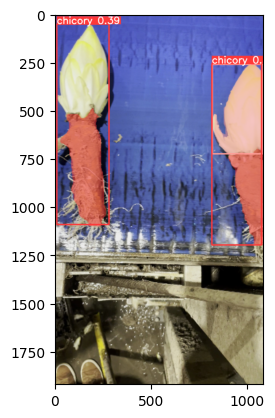

image 1/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__0300.jpg: 640x384 2 chicorys, 1 loaf, 99.3ms


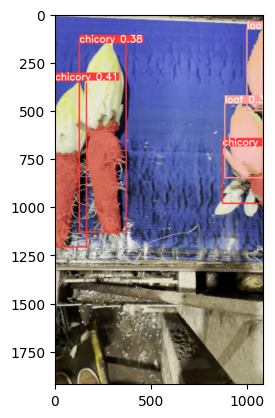

image 2/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__0480.jpg: 640x384 3 chicorys, 2 loafs, 12.0ms


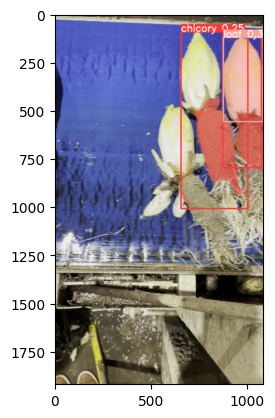

image 3/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__0510.jpg: 640x384 2 chicorys, 1 loaf, 13.2ms


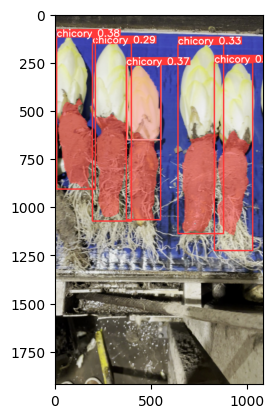

image 4/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__0570.jpg: 640x384 5 chicorys, 1 loaf, 13.1ms


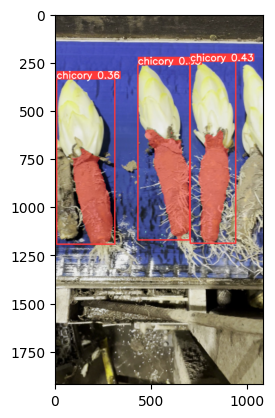

image 5/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__0840.jpg: 640x384 3 chicorys, 15.0ms


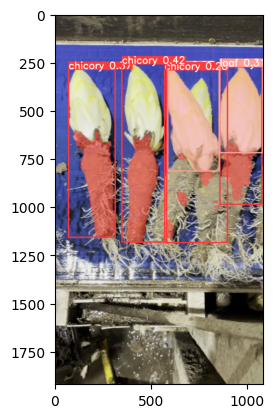

image 6/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__0870.jpg: 640x384 4 chicorys, 2 loafs, 16.2ms


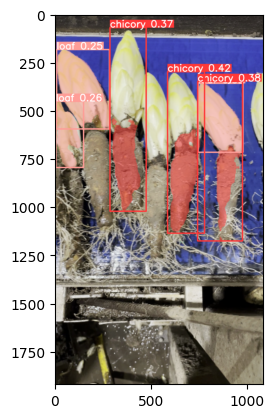

image 7/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__1470.jpg: 640x384 3 chicorys, 3 loafs, 17.0ms


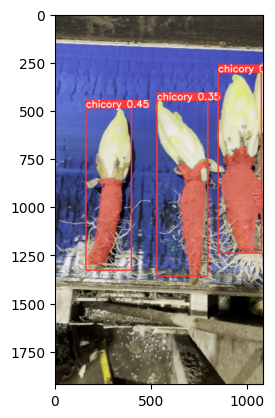

image 8/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__1650.jpg: 640x384 3 chicorys, 19.0ms


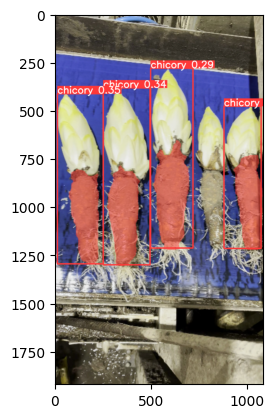

image 9/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__1860.jpg: 640x384 4 chicorys, 19.9ms


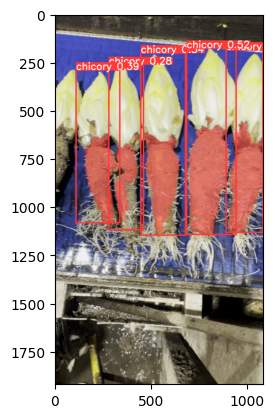

image 10/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__2340.jpg: 640x384 5 chicorys, 21.5ms


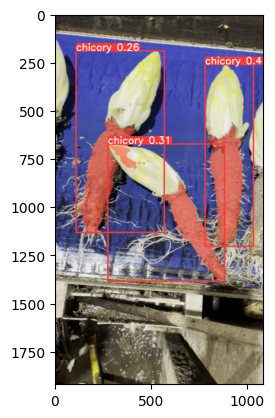

image 11/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__2430.jpg: 640x384 3 chicorys, 22.0ms


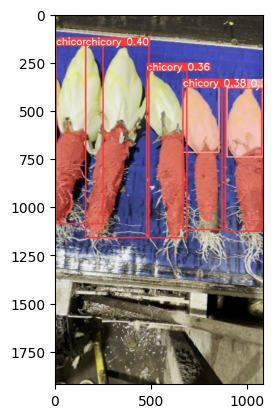

image 12/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__2700.jpg: 640x384 5 chicorys, 2 loafs, 22.0ms


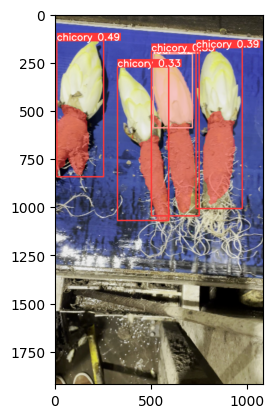

image 13/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__2820.jpg: 640x384 4 chicorys, 1 loaf, 22.0ms


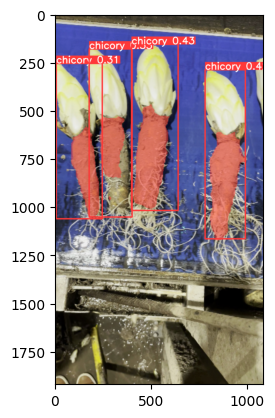

image 14/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__2850.jpg: 640x384 4 chicorys, 21.1ms


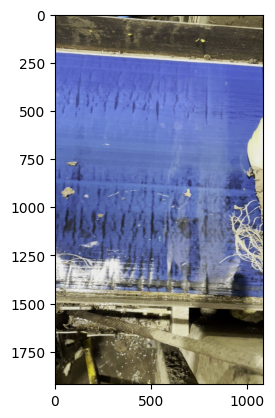

image 15/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__3420.jpg: 640x384 (no detections), 49.5ms


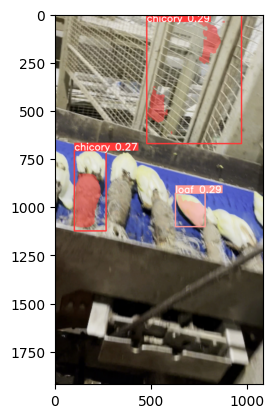

image 16/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof1__3690.jpg: 640x384 2 chicorys, 1 loaf, 49.6ms


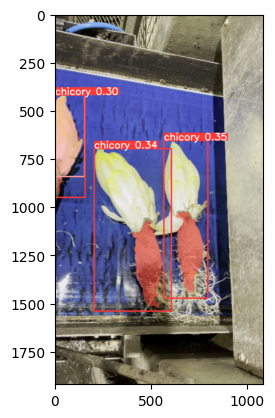

image 17/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__0060.jpg: 640x384 3 chicorys, 1 loaf, 49.0ms


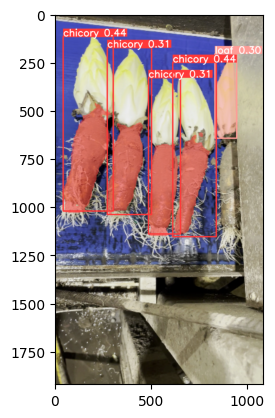

image 18/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__0210.jpg: 640x384 4 chicorys, 1 loaf, 47.9ms


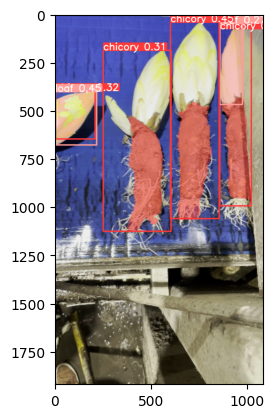

image 19/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__0570.jpg: 640x384 4 chicorys, 2 loafs, 46.2ms


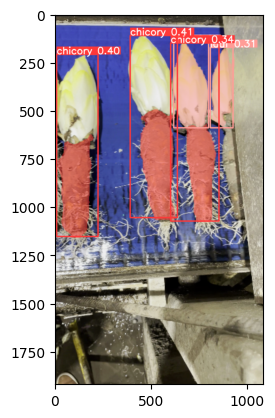

image 20/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__0720.jpg: 640x384 3 chicorys, 2 loafs, 47.0ms


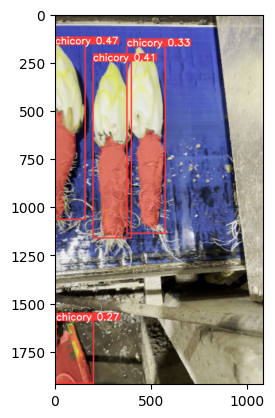

image 21/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__0810.jpg: 640x384 4 chicorys, 47.3ms


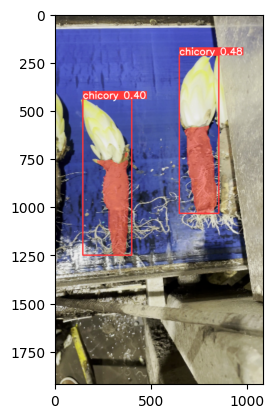

image 22/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__1530.jpg: 640x384 2 chicorys, 46.5ms


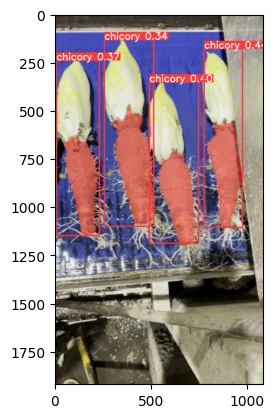

image 23/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__1650.jpg: 640x384 4 chicorys, 46.3ms


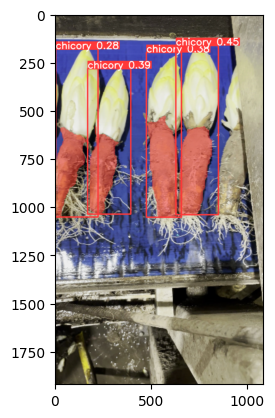

image 24/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__2730.jpg: 640x384 4 chicorys, 122.5ms


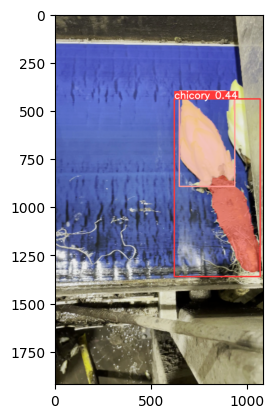

image 25/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__2850.jpg: 640x384 1 chicory, 1 loaf, 42.6ms


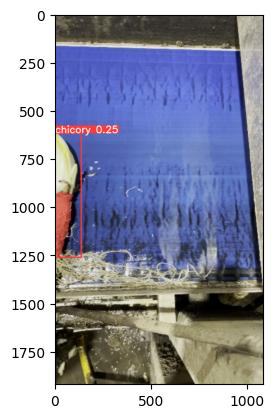

image 26/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__3270.jpg: 640x384 1 chicory, 44.9ms


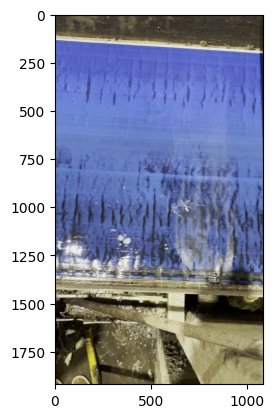

image 27/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__3840.jpg: 640x384 (no detections), 44.2ms


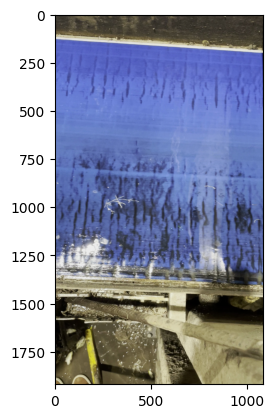

image 28/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__3870.jpg: 640x384 (no detections), 44.8ms


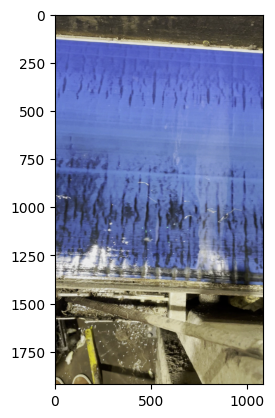

image 29/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__3900.jpg: 640x384 (no detections), 42.7ms


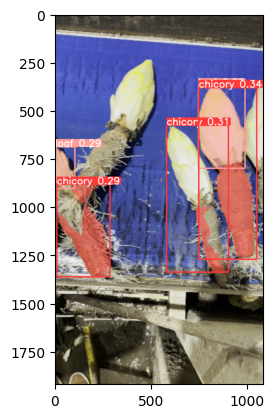

image 30/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__4080.jpg: 640x384 3 chicorys, 2 loafs, 44.4ms


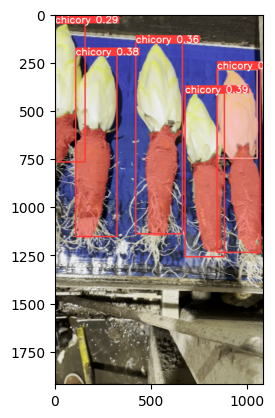

image 31/31 C:\Users\matth\OneDrive - KU Leuven\Python_Projects\machine_vision\scripts\7_applications\..\..\data\chicory_data_segmentation\images\witfloof2__4530.jpg: 640x384 5 chicorys, 1 loaf, 40.9ms


Speed: 3.7ms preprocess, 38.4ms inference, 14.7ms postprocess per image at shape (1, 3, 640, 384)


In [7]:
# Predict with the model
results = model('../../data/chicory_data_segmentation/autosplit_test.txt', stream=True)  # predict on an image

# Plot results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(im)
    plt.show()